<h1 style="color:orange">QDA Exam - June 2024</h1> 
Francesco Marco Riboli - 10502512 - 8CFU

# Exercise 1

The quality of a new pharmaceutical product is monitored by means of 3 quality indicators: “x0”, “x1” and
“x2”. The data collected over 1 week of production is reported in “PCA_phase1.csv”. Data are reported in the
original data acquisition order.

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
from statsmodels.tsa.arima.model import ARIMA
import itertools
import statsmodels.graphics.tsaplots as sgt
from statsmodels.sandbox.stats.runs import runstest_1samp
from sklearn.decomposition import PCA

In [3]:

# Import the dataset
phase1_data = pd.read_csv('PCA_phase1.csv')

# Inspect the dataset
phase1_data.head()

,x_0,x_1,x_2
0,12.015844,19.033161,1497.462035
1,11.680987,12.403776,1500.361767
2,10.342330,22.627300,1494.326740
3,8.875826,9.160908,1502.712771
4,19.594685,29.381201,1508.061137


In [4]:
phase1_data.describe()

,x_0,x_1,x_2
count,50.000000,50.000000,50.000000
mean,10.134306,16.655172,1500.319798
std,3.496424,4.665424,5.408455
min,4.945754,5.102732,1487.961447
25%,7.511384,13.681684,1496.823768
50%,9.504988,16.700346,1499.863184
75%,12.312413,19.801311,1503.710547
max,19.594685,29.381201,1513.261693


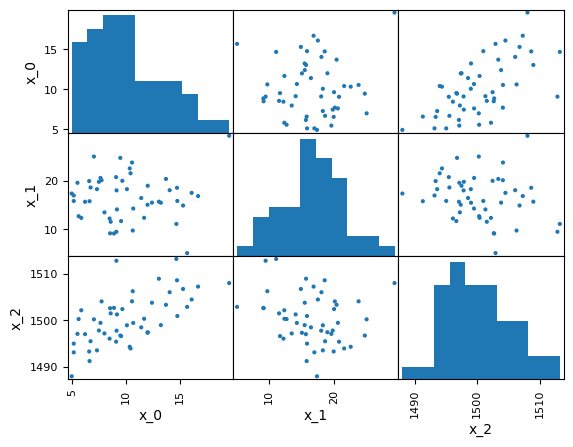

In [5]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(phase1_data, alpha = 1)
plt.show()

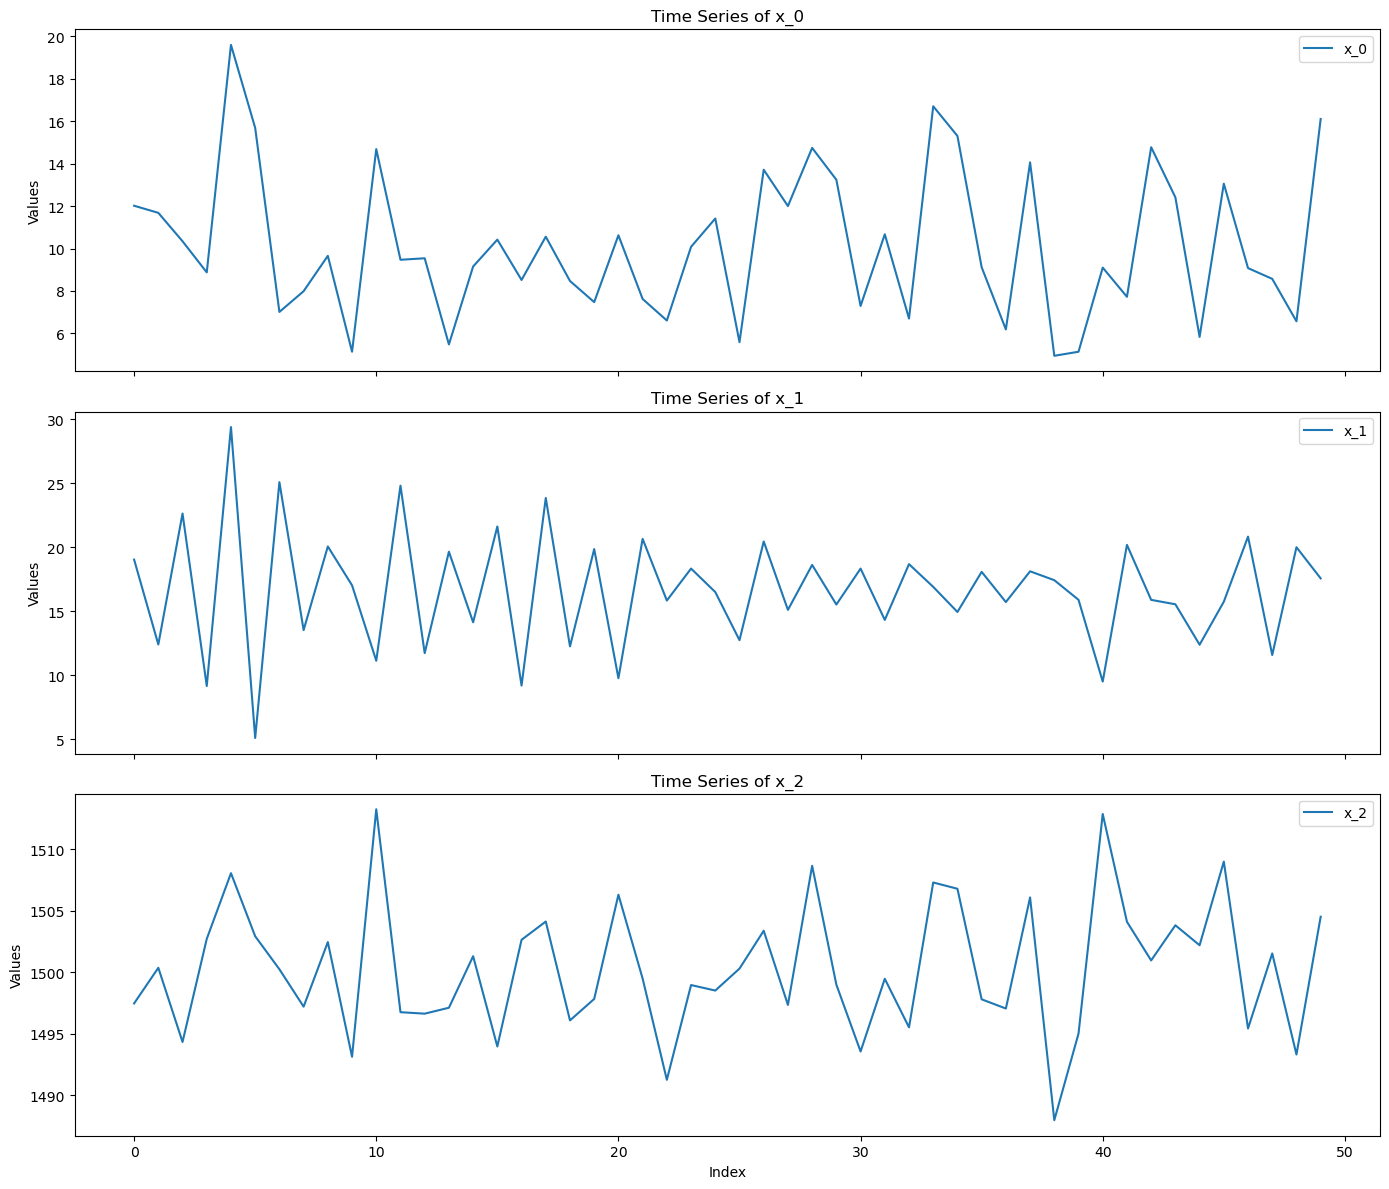

In [6]:
# Plot time series of each Xi variable on separate subplots within the same figure
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

for i, column in enumerate(phase1_data.columns):
    axs[i].plot(phase1_data.index, phase1_data[column], label=column)
    axs[i].set_title(f'Time Series of {column}')
    axs[i].set_ylabel('Values')
    axs[i].legend()

axs[-1].set_xlabel('Index')
plt.tight_layout()
plt.show()

Runs test p-value = 0.000
The data are not random (p-value < 0.05).


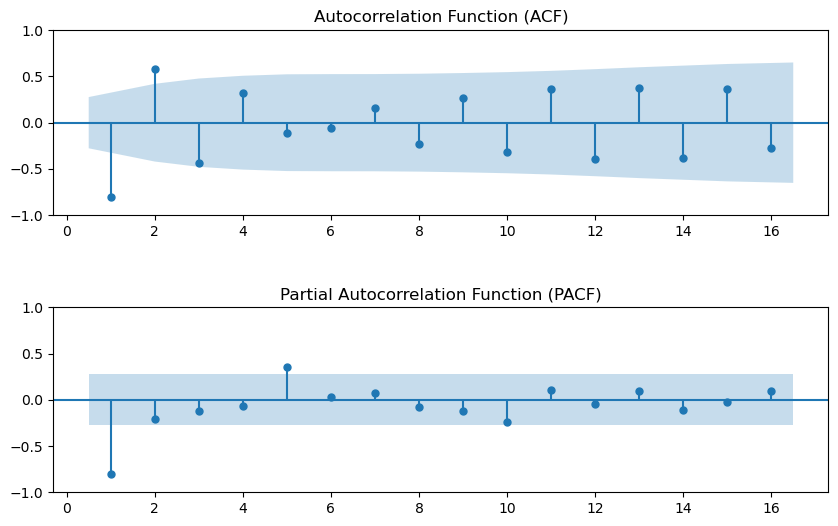

Shapiro-Wilk test p-value = 0.961
The data are normally distributed (p-value >= 0.05).


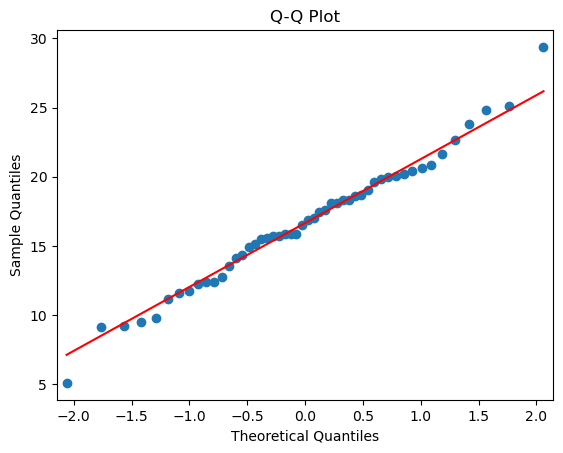

In [8]:
results=qda.runstest_acfpacf_sw(phase1_data,'x_1')

X1 is not random. I apply gapping till it becomes random

In [28]:
# Take one data point every 6
gap_size=3
phase1_data_gap = phase1_data[::gap_size]
phase1_data_gap.describe()

,x_0,x_1,x_2
count,17.000000,17.000000,17.000000
mean,9.542487,16.860150,1498.336388
std,3.382226,3.838728,4.625367
min,5.136048,9.160908,1493.121737
25%,7.011647,15.716506,1495.004982
50%,8.875826,16.497655,1497.340333
75%,11.999810,19.033161,1500.242606
max,16.702404,25.079926,1509.002473


Runs test p-value = 0.442
The data are random (p-value >= 0.05).


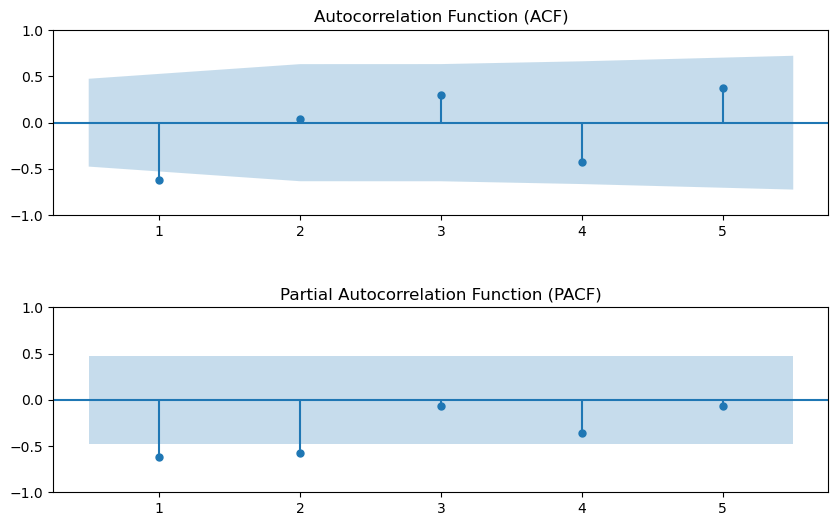

Shapiro-Wilk test p-value = 0.894
The data are normally distributed (p-value >= 0.05).


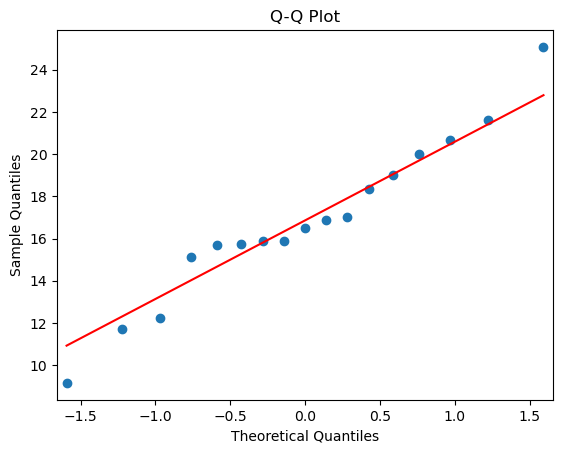

In [32]:
results=qda.runstest_acfpacf_sw(phase1_data_gap,'x_1')

## a) For these data, is it more appropriate to apply the PCA using the variance-covariance matrix of the data or their correlation matrix? Motivate your answer. 

In [7]:
# Create the variance covariance matrix using pandas
cov_matrix = phase1_data.cov()
print(cov_matrix)

           x_0        x_1        x_2
x_0  12.224982   0.703305  11.930233
x_1   0.703305  21.766177  -5.259157
x_2  11.930233  -5.259157  29.251388


The  variables  have  quite  different marginal  variances.  Thus, it is  more  appropriate  to estimate  the  PCA  by 
using the correlation matrix of the original data, which is equivalent to standardize the data and estimate the 
PCA for the standardized variables. 

In [8]:
# Create the correlation matrix using pandas
corr_matrix = phase1_data.corr()
print(corr_matrix)

          x_0       x_1       x_2
x_0  1.000000  0.043115  0.630887
x_1  0.043115  1.000000 -0.208426
x_2  0.630887 -0.208426  1.000000


## b) Based on the outcome of point 1, apply PCA to the available data and determine the number of principal components that should be retained to capture at least 80% of the total variance (report the eigenvectors and the eigenvalues of the retained components). Discuss the results trying to interpret the retained PCs. 

In [9]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
phase1_data_std = (phase1_data - phase1_data.mean()) / phase1_data.std()

phase1_data_std.describe()

,x_0,x_1,x_2
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,-1.065814e-16,2.342571e-16,-9.920509e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.483959e+00,-2.476182e+00,-2.285006e+00
25%,-7.501725e-01,-6.373457e-01,-6.464009e-01
50%,-1.799891e-01,9.682836e-03,-8.442587e-02
75%,6.229529e-01,6.743525e-01,6.269349e-01
max,2.705730e+00,2.727733e+00,2.392901e+00


In [11]:
# Apply the PCA on the correlation matrix instead of the covariance matrix
pca_corr = PCA()
pca_corr.fit(phase1_data_std) 
# Compare the eigenvalues
#print("Eigenvalues from ORIGINAL data \n", pca.explained_variance_)
print("Eigenvalues from STANDARDIZED data \n", pca_corr.explained_variance_)
# Compare the eigenvectors
#print("\nEigenvectors from ORIGINAL data \n", pca.components_)
print("Eigenvectors from STANDARDIZED data \n", pca_corr.components_)
# Compare the explained variance ratio
#print("\nExplained variance ratio from ORIGINAL data \n", pca.explained_variance_ratio_)
print("Explained variance ratio from STANDARDIZED data \n", pca_corr.explained_variance_ratio_)
# Compare the cumulative explained variance ratio
#print("\nCumulative explained variance ratio from ORIGINAL data \n", np.cumsum(pca.explained_variance_ratio_))
print("Cumulative explained variance ratio from STANDARDIZED data \n", np.cumsum(pca_corr.explained_variance_ratio_))

Eigenvalues from STANDARDIZED data 
 [1.65264485 1.02561469 0.32174046]
Eigenvectors from STANDARDIZED data 
 [[ 0.67701814 -0.18293361  0.71286867]
 [ 0.31135466  0.9488588  -0.05220398]
 [-0.66686185  0.25729802  0.69935185]]
Explained variance ratio from STANDARDIZED data 
 [0.55088162 0.34187156 0.10724682]
Cumulative explained variance ratio from STANDARDIZED data 
 [0.55088162 0.89275318 1.        ]


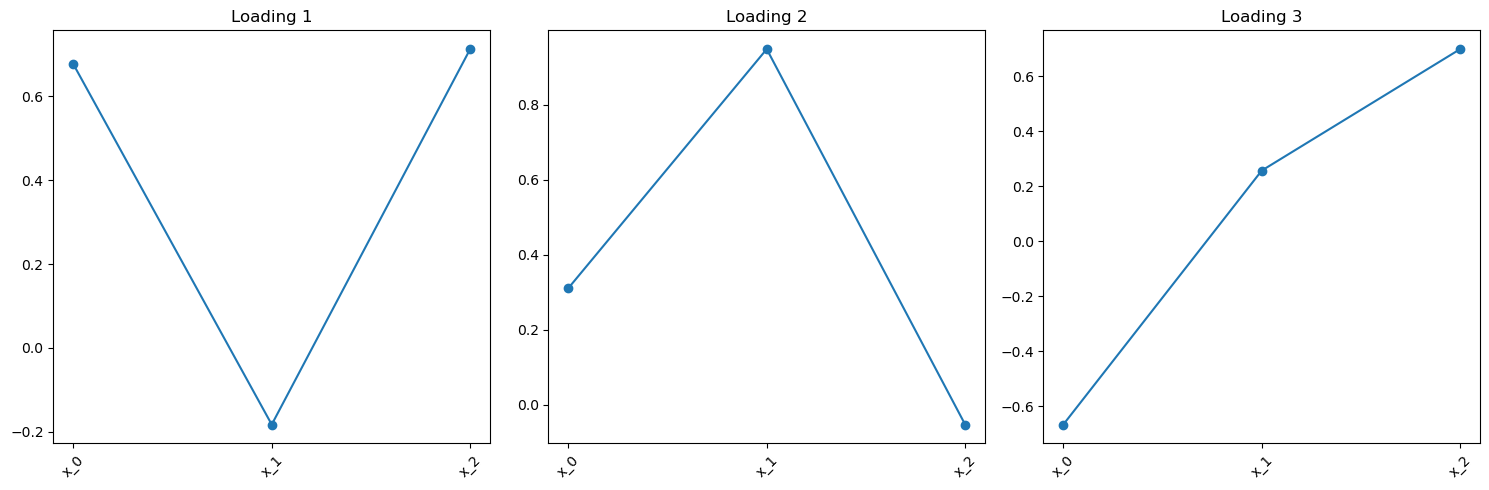

In [12]:
# Parametrize the plotting code based on the number of variables
num_components = pca_corr.components_.shape[0]

# Plot the loadings
fig, ax = plt.subplots(1, num_components, figsize=(5 * num_components, 5))

for i in range(num_components):
    ax[i].plot(pca_corr.components_[i], 'o-')
    ax[i].set_title(f'Loading {i + 1}')
    ax[i].set_xticks(range(len(phase1_data.columns)))
    ax[i].set_xticklabels(phase1_data.columns, rotation=45)

plt.tight_layout()
plt.show()

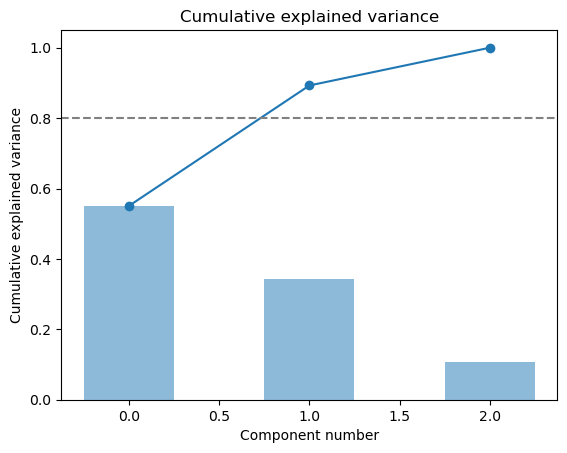

In [14]:
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca_corr.explained_variance_ratio_), 'o-')
# add a bar chart to the plot
plt.bar(range(0, len(pca_corr.explained_variance_ratio_)), pca_corr.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.axhline(0.8, color='gray', linestyle='--', linewidth=1.5)
plt.title('Cumulative explained variance')
plt.show()

In [17]:
# Compute the scores
scores = pca_corr.transform(phase1_data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3'])
# Print the first rows of the scores dataframe
scores_df.describe()

,PC1,PC2,PC3
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,-6.661338e-17,-1.554312e-17,1.554312e-17
std,1.285552e+00,1.012726e+00,5.672217e-01
min,-2.663779e+00,-1.880651e+00,-1.357991e+00
25%,-9.629977e-01,-6.977398e-01,-4.821929e-01
50%,-4.517600e-02,7.929242e-02,-4.273524e-02
75%,9.466948e-01,5.952473e-01,3.063300e-01
max,2.803011e+00,3.355953e+00,1.426701e+00


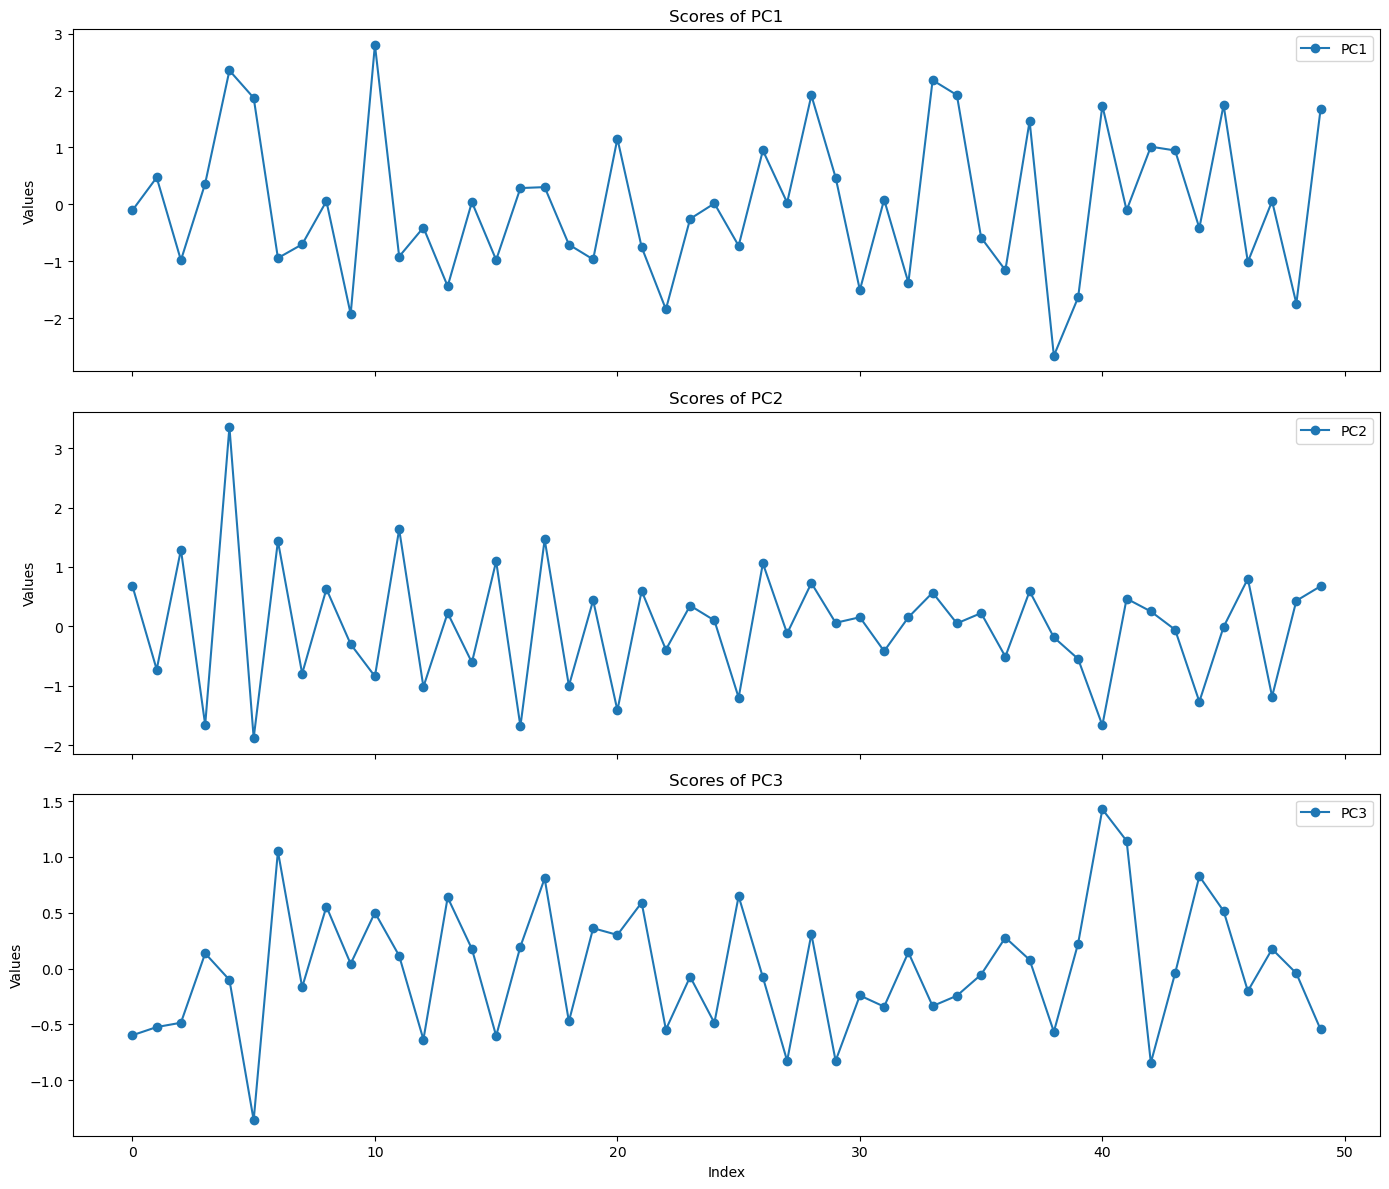

In [18]:
# Plot time series of each Xi variable on separate subplots within the same figure
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

for i, column in enumerate(scores_df.columns):
    axs[i].plot(scores_df.index, scores_df[column],'o-', label=column)
    axs[i].set_title(f'Scores of {column}')
    axs[i].set_ylabel('Values')
    axs[i].legend()

axs[-1].set_xlabel('Index')
plt.tight_layout()
plt.show()

Runs test p-value = 0.022
The data are not random (p-value < 0.05).


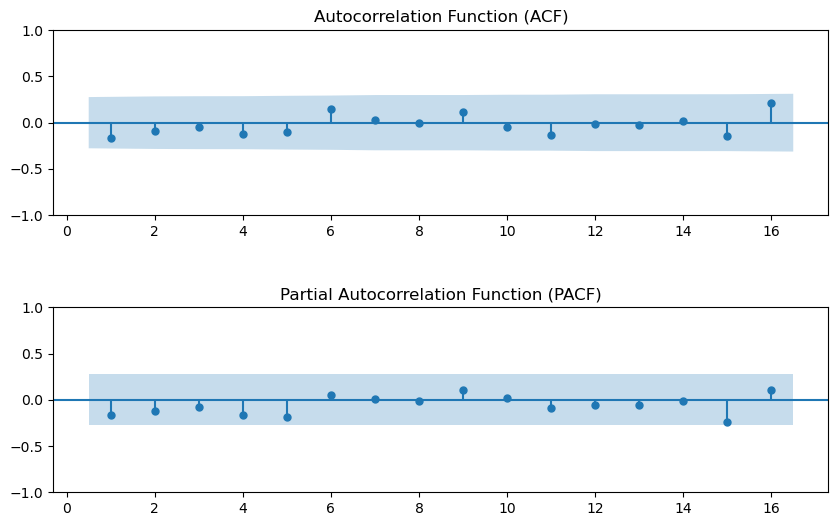

Shapiro-Wilk test p-value = 0.297
The data are normally distributed (p-value >= 0.05).


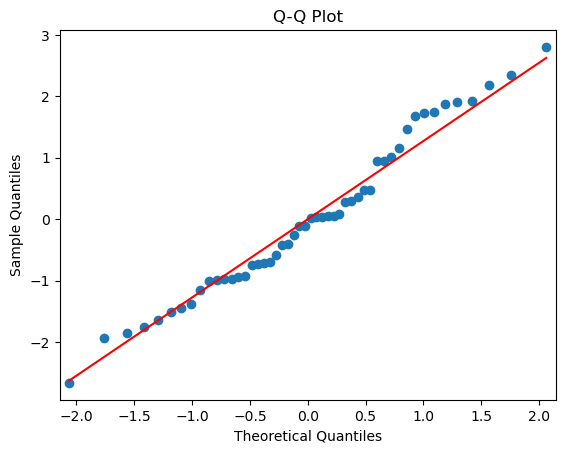

In [19]:
results = qda.runstest_acfpacf_sw(scores_df, 'PC1')

Runs test p-value = 0.001
The data are not random (p-value < 0.05).


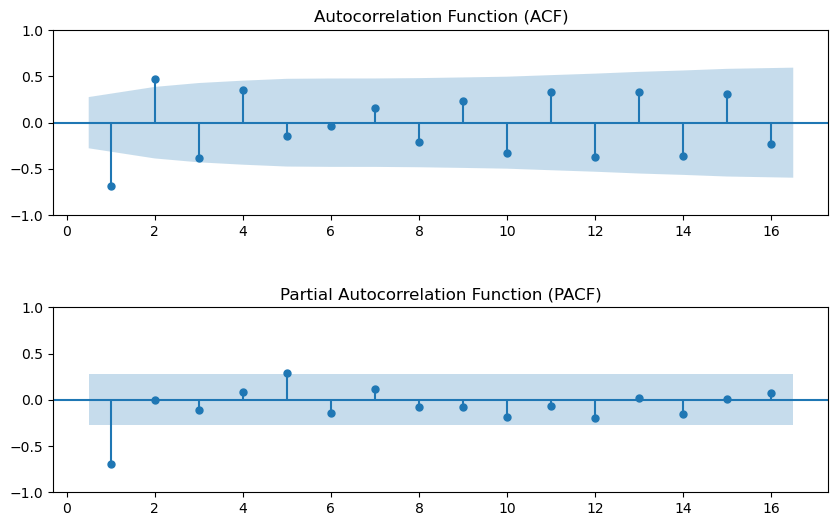

Shapiro-Wilk test p-value = 0.180
The data are normally distributed (p-value >= 0.05).


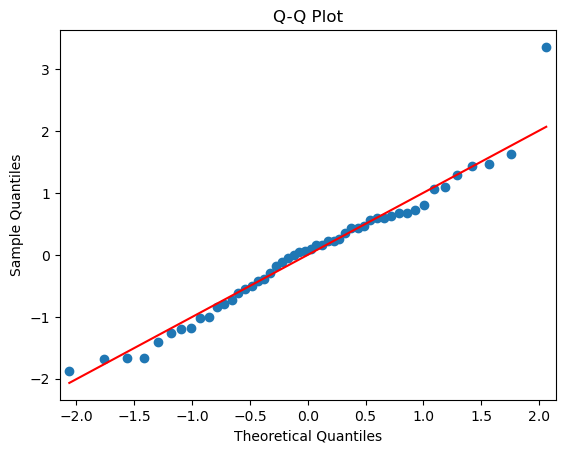

In [20]:
results = qda.runstest_acfpacf_sw(scores_df, 'PC2')

## Redo PCA on gapped dataset

In [33]:
# Create the variance covariance matrix using pandas
cov_matrix = phase1_data_gap.cov()
print(cov_matrix)

           x_0        x_1        x_2
x_0  11.439455  -1.712131  10.465474
x_1  -1.712131  14.735829  -3.040962
x_2  10.465474  -3.040962  21.394024


The  variables  have  quite  different marginal  variances.  Thus, it is  more  appropriate  to estimate  the  PCA  by 
using the correlation matrix of the original data, which is equivalent to standardize the data and estimate the 
PCA for the standardized variables. 

In [34]:
# Create the correlation matrix using pandas
corr_matrix = phase1_data_gap.corr()
print(corr_matrix)

          x_0       x_1       x_2
x_0  1.000000 -0.131870  0.668975
x_1 -0.131870  1.000000 -0.171269
x_2  0.668975 -0.171269  1.000000


In [35]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
phase1_data_gap_std = (phase1_data_gap - phase1_data_gap.mean()) / phase1_data_gap.std()

phase1_data_gap_std.describe()

,x_0,x_1,x_2
count,1.700000e+01,1.700000e+01,1.700000e+01
mean,-9.796086e-17,7.118489e-16,-1.158550e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.302822e+00,-2.005675e+00,-1.127402e+00
25%,-7.482764e-01,-2.979227e-01,-7.202467e-01
50%,-1.971072e-01,-9.443101e-02,-2.153460e-01
75%,7.265401e-01,5.660758e-01,4.121226e-01
max,2.116924e+00,2.141276e+00,2.305997e+00


In [36]:
# Apply the PCA on the correlation matrix instead of the covariance matrix
pca_corr = PCA()
pca_corr.fit(phase1_data_gap_std) 
# Compare the eigenvalues
#print("Eigenvalues from ORIGINAL data \n", pca.explained_variance_)
print("Eigenvalues from STANDARDIZED data \n", pca_corr.explained_variance_)
# Compare the eigenvectors
#print("\nEigenvectors from ORIGINAL data \n", pca.components_)
print("Eigenvectors from STANDARDIZED data \n", pca_corr.components_)
# Compare the explained variance ratio
#print("\nExplained variance ratio from ORIGINAL data \n", pca.explained_variance_ratio_)
print("Explained variance ratio from STANDARDIZED data \n", pca_corr.explained_variance_ratio_)
# Compare the cumulative explained variance ratio
#print("\nCumulative explained variance ratio from ORIGINAL data \n", np.cumsum(pca.explained_variance_ratio_))
print("Cumulative explained variance ratio from STANDARDIZED data \n", np.cumsum(pca_corr.explained_variance_ratio_))

Eigenvalues from STANDARDIZED data 
 [1.73180775 0.93838791 0.32980435]
Eigenvectors from STANDARDIZED data 
 [[ 0.67458885 -0.28128845  0.68250032]
 [ 0.22997045  0.95862463  0.16778678]
 [-0.7014581   0.04376781  0.71136552]]
Explained variance ratio from STANDARDIZED data 
 [0.57726925 0.31279597 0.10993478]
Cumulative explained variance ratio from STANDARDIZED data 
 [0.57726925 0.89006522 1.        ]


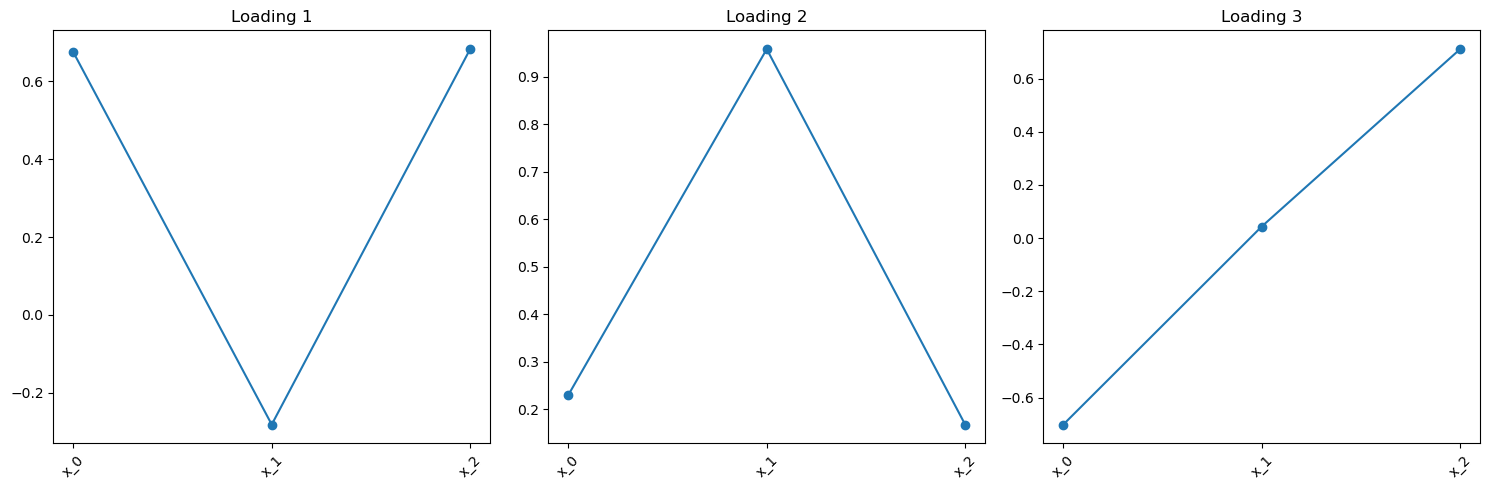

In [37]:
# Parametrize the plotting code based on the number of variables
num_components = pca_corr.components_.shape[0]

# Plot the loadings
fig, ax = plt.subplots(1, num_components, figsize=(5 * num_components, 5))

for i in range(num_components):
    ax[i].plot(pca_corr.components_[i], 'o-')
    ax[i].set_title(f'Loading {i + 1}')
    ax[i].set_xticks(range(len(phase1_data.columns)))
    ax[i].set_xticklabels(phase1_data.columns, rotation=45)

plt.tight_layout()
plt.show()

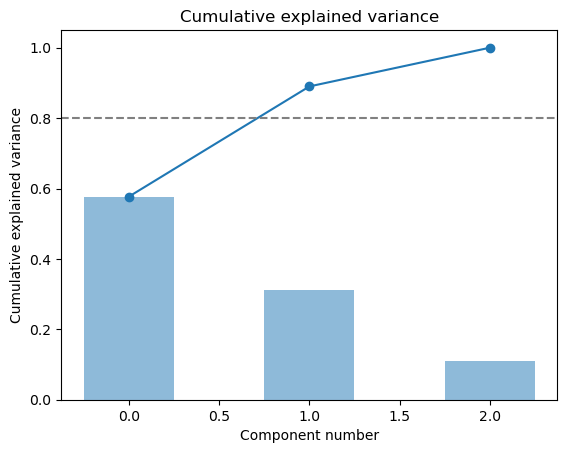

In [38]:
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca_corr.explained_variance_ratio_), 'o-')
# add a bar chart to the plot
plt.bar(range(0, len(pca_corr.explained_variance_ratio_)), pca_corr.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.axhline(0.8, color='gray', linestyle='--', linewidth=1.5)
plt.title('Cumulative explained variance')
plt.show()

In [40]:
# Compute the scores
scores = pca_corr.transform(phase1_data_gap_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3'])
# Print the first rows of the scores dataframe
scores_df.describe()

,PC1,PC2,PC3
count,1.700000e+01,1.700000e+01,1.700000e+01
mean,-5.224579e-17,-3.918434e-17,1.469413e-17
std,1.315982e+00,9.687042e-01,5.742859e-01
min,-1.660086e+00,-1.809264e+00,-8.009904e-01
25%,-8.258214e-01,-5.604713e-01,-3.654873e-01
50%,-2.094364e-01,4.296356e-02,-1.215522e-01
75%,4.716526e-01,6.791097e-01,4.842611e-01
max,2.748161e+00,1.949747e+00,9.117733e-01


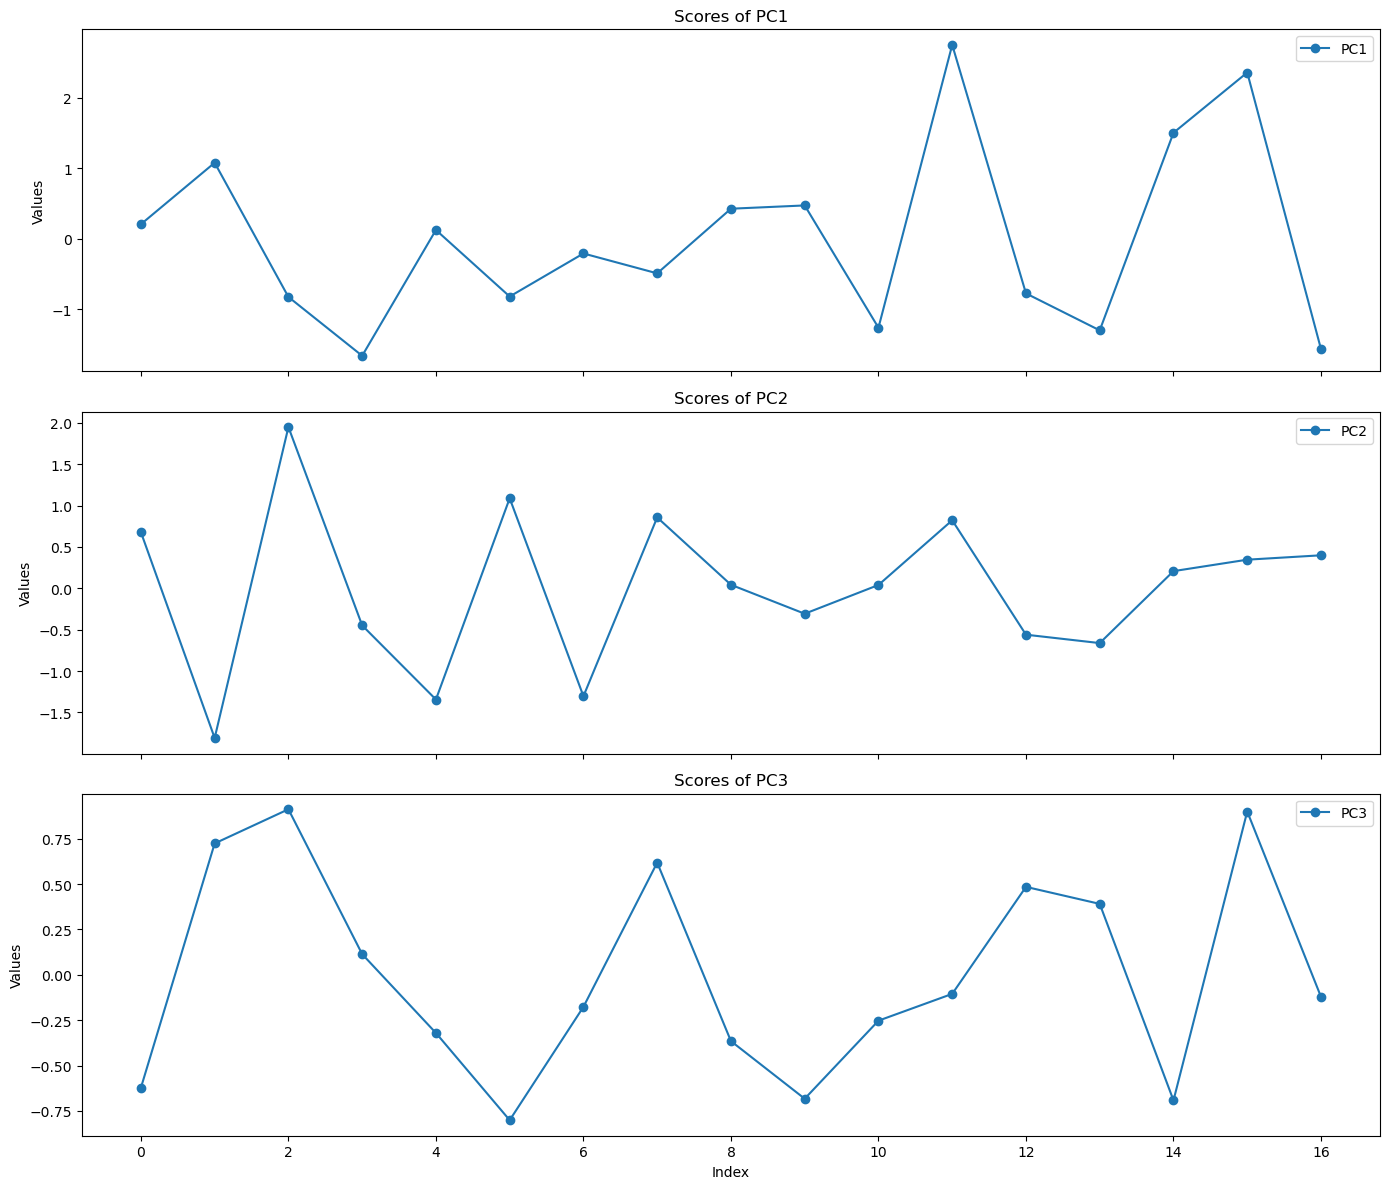

In [41]:
# Plot time series of each Xi variable on separate subplots within the same figure
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

for i, column in enumerate(scores_df.columns):
    axs[i].plot(scores_df.index, scores_df[column],'o-', label=column)
    axs[i].set_title(f'Scores of {column}')
    axs[i].set_ylabel('Values')
    axs[i].legend()

axs[-1].set_xlabel('Index')
plt.tight_layout()
plt.show()

Runs test p-value = 0.790
The data are random (p-value >= 0.05).


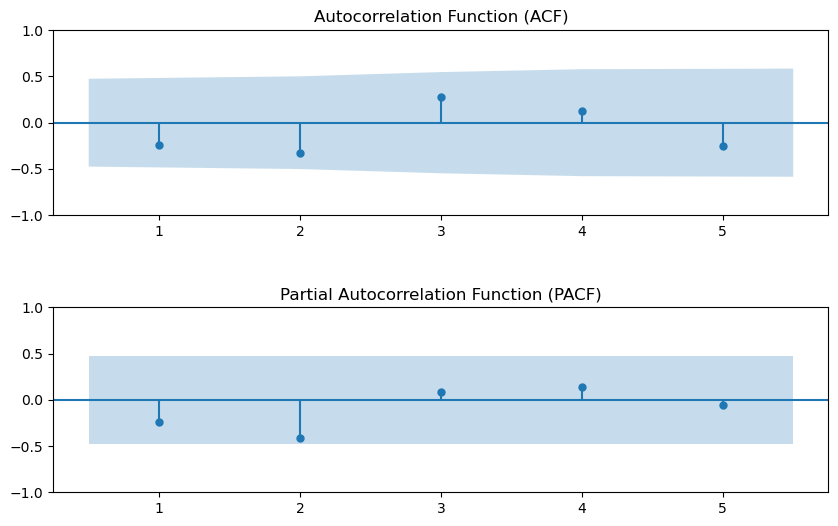

Shapiro-Wilk test p-value = 0.226
The data are normally distributed (p-value >= 0.05).


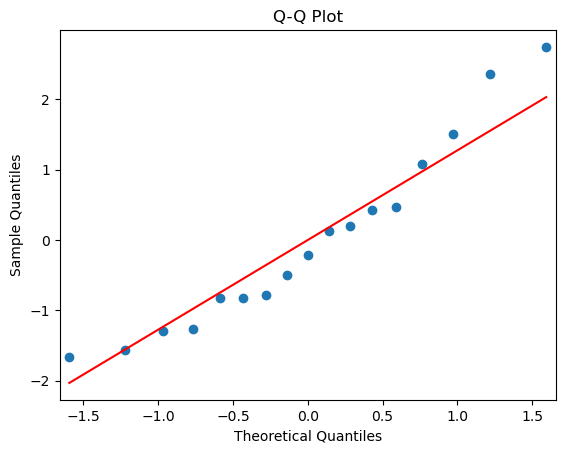

In [42]:
results = qda.runstest_acfpacf_sw(scores_df, 'PC1')

Runs test p-value = 0.360
The data are random (p-value >= 0.05).


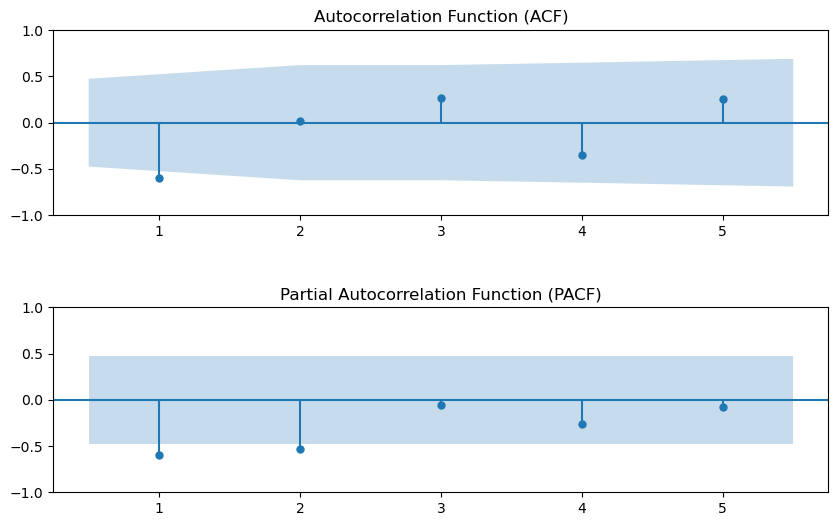

Shapiro-Wilk test p-value = 0.985
The data are normally distributed (p-value >= 0.05).


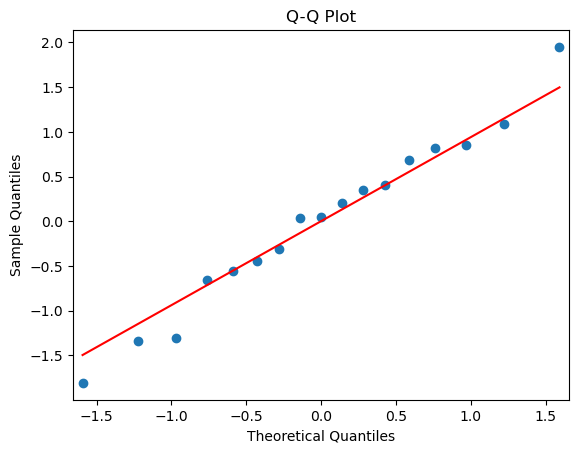

In [43]:
results = qda.runstest_acfpacf_sw(scores_df, 'PC2')

In [44]:
# Given information
#ARL0 = 350
m = 2  # number of hypothesis tests

# Calculate the overall significance level
#alpha = 1 / ARL0
alpha=0.01
# Apply the Bonferroni correction
alpha_adjusted = alpha / m

# Determine the critical value k for a two-sided test
k = stats.norm.ppf(1 - alpha_adjusted / 2)

print(f"The critical value k is: {k}")

The critical value k is: 2.807033768343811


Now let's build the two I-MR Control Charts

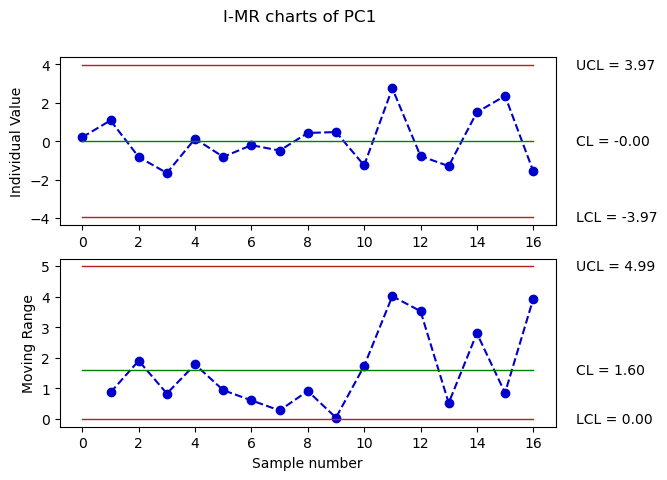

In [45]:
data_IMR = qda.ControlCharts.IMR(scores_df,'PC1',k)

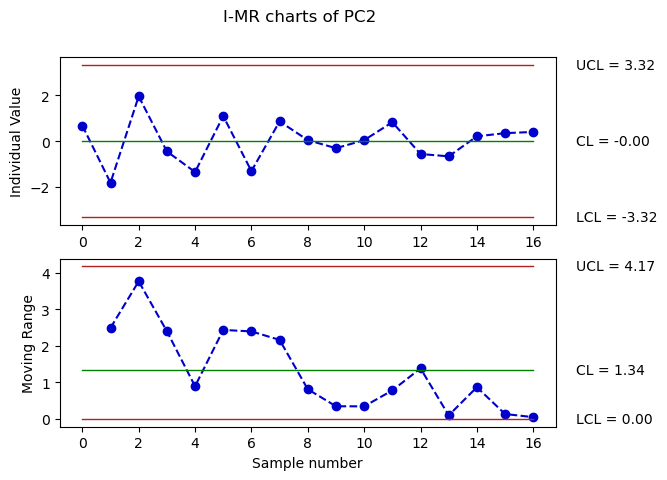

In [46]:
data_IMR = qda.ControlCharts.IMR(scores_df,'PC2',k)